In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from hub_tools import *
from astropy.coordinates import SkyCoord
from astropy import units as u

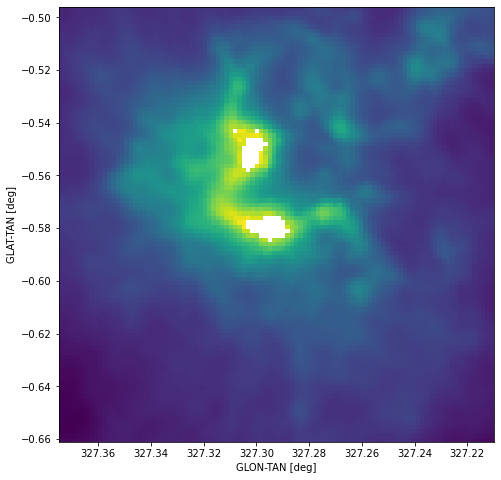

,Seq,Name,RAJ2000,DEJ2000,amaj,amin,PA,FWHM,Sp,Sint,S_N
0,916,G327.2921-0.5792,238.2851,-54.6191,25,22,0,23,49.21,71.17,243.25
1,918,G327.2970-0.5440,238.2530,-54.5888,29,19,144,24,2.35,3.53,19.67
2,919,G327.3005-0.5509,238.2653,-54.5919,38,28,63,33,11.26,32.27,88.00
3,920,G327.3039-0.5775,238.2989,-54.6104,50,22,147,33,7.14,21.32,58.15
4,922,G327.3062-0.5422,238.2633,-54.5816,32,31,14,31,3.51,9.43,33.92
5,923,G327.3087-0.5596,238.2857,-54.5935,24,20,101,22,1.96,2.55,17.33
6,924,G327.3104-0.5503,238.2778,-54.5852,32,19,76,25,0.83,1.39,9.02
7,925,G327.3119-0.5727,238.3044,-54.6016,30,20,100,24,1.20,1.91,12.58


In [11]:
%matplotlib inline

path = '../../IAstro2/'

info = 'sat21sources.fits'
file = 'SAT250_21.fits'

image = fits.open(path+file)[0].data
table = fits.open(path+info)[1].data
tab_head = fits.open(path+info)[1].header

grid,data,sat = display_fits(path+file,return_vals=True)
xl,xr,yb,yt = grid[0][0,0], grid[0][0,-1], grid[1][0,0], grid[1][-1,0]

df = pd.DataFrame(table)
df

In [12]:
#using astropy converter

df['l'] = np.empty(8)
df['b'] = np.empty(8)

names = df['Name'].copy()

for i in range(len(names)):
    df.iloc[i,-2] = float(names[i][1:9])
    df.iloc[i,-1] = float(names[i][9:])
df

,Seq,Name,RAJ2000,DEJ2000,amaj,amin,PA,FWHM,Sp,Sint,S_N,l,b
0,916,G327.2921-0.5792,238.2851,-54.6191,25,22,0,23,49.21,71.17,243.25,327.2921,-0.5792
1,918,G327.2970-0.5440,238.2530,-54.5888,29,19,144,24,2.35,3.53,19.67,327.2970,-0.5440
2,919,G327.3005-0.5509,238.2653,-54.5919,38,28,63,33,11.26,32.27,88.00,327.3005,-0.5509
3,920,G327.3039-0.5775,238.2989,-54.6104,50,22,147,33,7.14,21.32,58.15,327.3039,-0.5775
4,922,G327.3062-0.5422,238.2633,-54.5816,32,31,14,31,3.51,9.43,33.92,327.3062,-0.5422
5,923,G327.3087-0.5596,238.2857,-54.5935,24,20,101,22,1.96,2.55,17.33,327.3087,-0.5596
6,924,G327.3104-0.5503,238.2778,-54.5852,32,19,76,25,0.83,1.39,9.02,327.3104,-0.5503
7,925,G327.3119-0.5727,238.3044,-54.6016,30,20,100,24,1.20,1.91,12.58,327.3119,-0.5727


In [13]:
mu_vals = np.array(df.iloc[:,-2:],float)
theta_vals = np.array(df['PA'],float)
FWHM_vals = np.array(df.iloc[:,4:6],float)

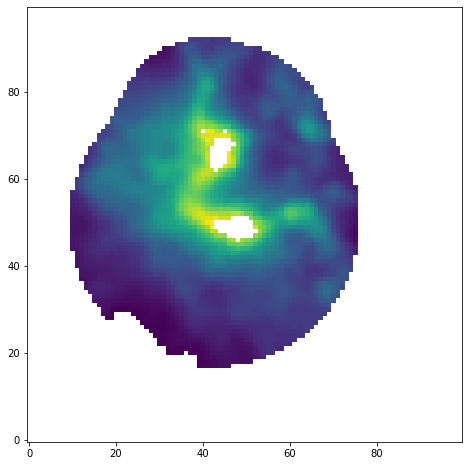

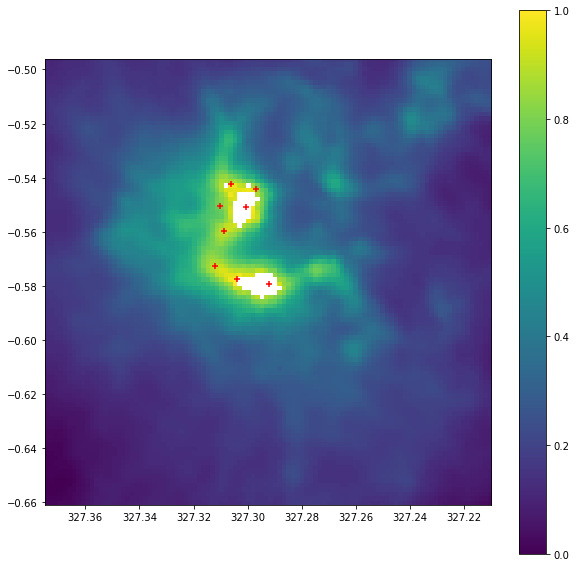

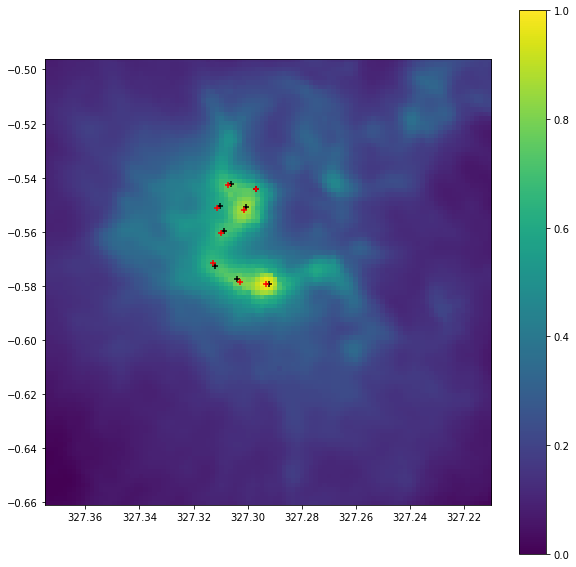

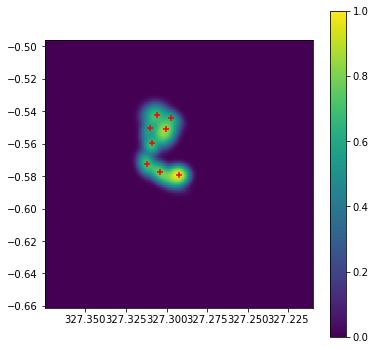

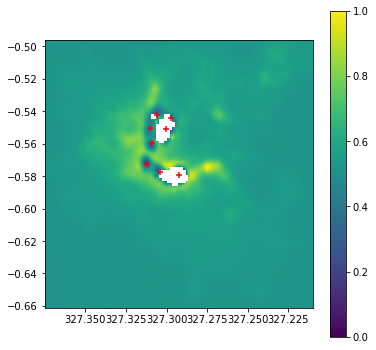

In [35]:
%matplotlib inline
params,image = fitter(grid,data,peaks=8,mu=mu_vals,theta=theta_vals,FWHM=FWHM_vals,dist_factor=4,bg_method='hist',var_pos=0.001)
bg = background(data[~np.isnan(data)])

gaussians = gaussianMult(grid,*params) + bg
residuals = data - gaussians

plt.figure(figsize=(10,10))
plt.imshow(np.log10(data),origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(np.log10(image),origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='black',marker='+')
plt.scatter(params[::6],params[1::6],color='red',marker='+')
plt.colorbar()
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(np.log10(gaussians),origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')
plt.colorbar()
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(residuals,origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')
plt.colorbar()
plt.show()

# remove the """ """ to view

# Using automated table input:

In [ ]:
info = 'sat21sources.fits'
file = 'SAT250_21.fits'

image = fits.open(file)[0].data

grid,data,sat = display_fits(file,return_vals=True)



In [ ]:
params,image,residuals = fitter(grid,data,input_filename=info,peaks=8,dist_factor=2,exclude_below=0.5,var_pos=0.0001)


In [ ]:
params,image,residuals = fitter(grid,data,peaks=8,mu=mu_vals,theta=theta_vals,FWHM=FWHM_vals,dist_factor=2,exclude_below=0.1,var_pos=0.0001)



In [32]:
header = fits.open(file)[0].header

fits.writeto("SAT250_21_mode.fits", image, header, overwrite = True)

In [ ]:
header["CTYPE1"]

<IPython.core.display.Javascript object>


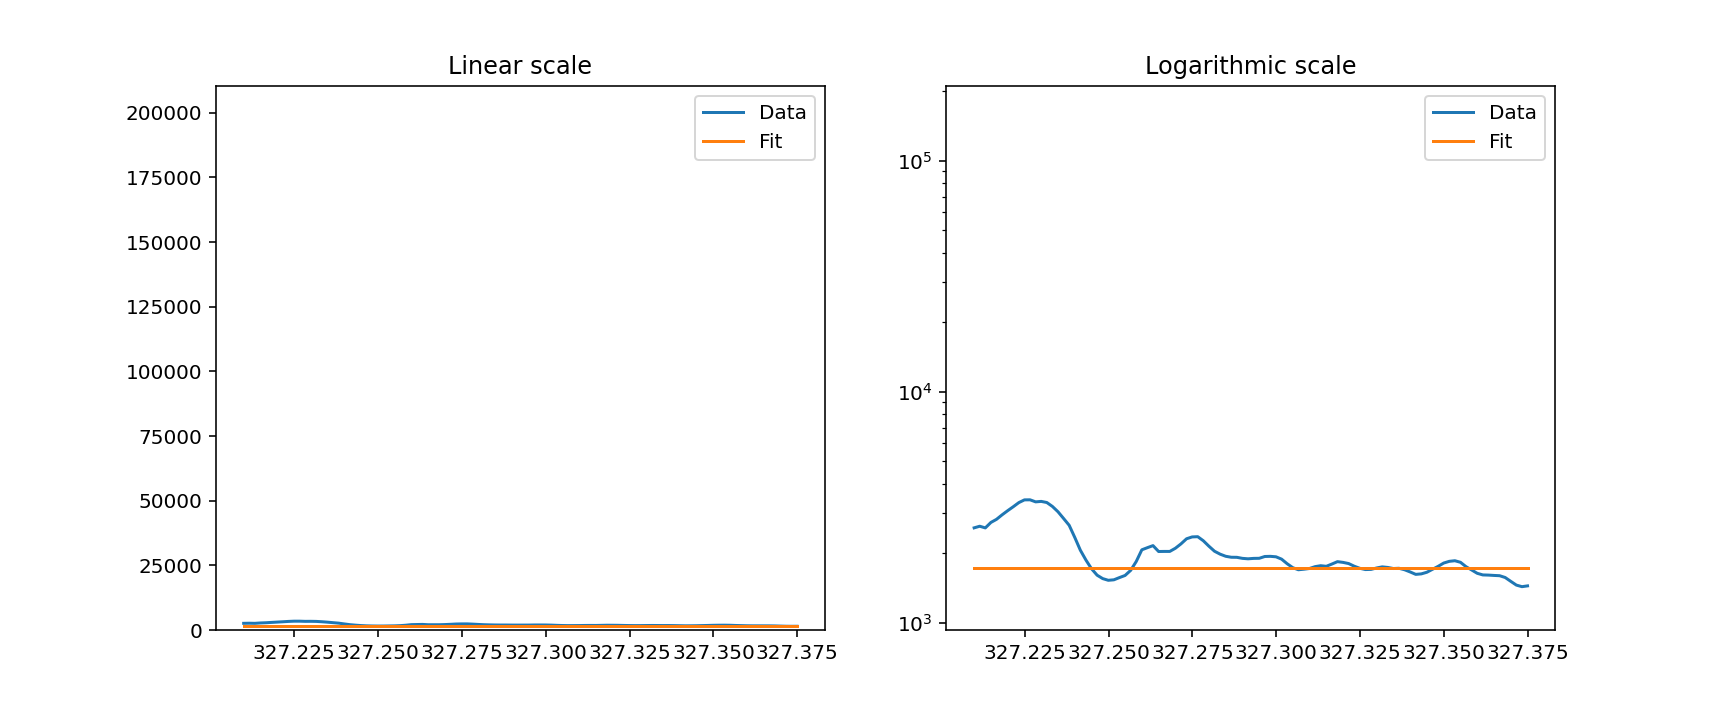

In [27]:
# Image sweeping to see fit explicitly

%matplotlib notebook
import matplotlib.animation as animation

X,Y = grid
x,y = X[0,:],Y[:,0]

fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

ax1.set_title('Linear scale')
ax2.set_title('Logarithmic scale')
ax1.set_ylim(0,gaussians.max())
ax2.set_ylim(data[~np.isnan(data)].min(),gaussians.max())
ax2.set_yscale('log')

line1, = ax1.plot(x,data[0,:],label='Data')
line2, = ax1.plot(x,gaussians[0,:],label='Fit')
line3, = ax2.plot(x,data[0,:],label='Data')
line4, = ax2.plot(x,gaussians[0,:],label='Fit')
def f(i):
    line1.set_ydata(data[i,:])
    line2.set_ydata(gaussians[i,:])
    line3.set_ydata(data[i,:])
    line4.set_ydata(gaussians[i,:])
    return [line1,line2,line3,line4]
ax1.legend()
ax2.legend()
ani = animation.FuncAnimation(
    fig, f, interval=200, blit=True,save_count=50)
plt.show()

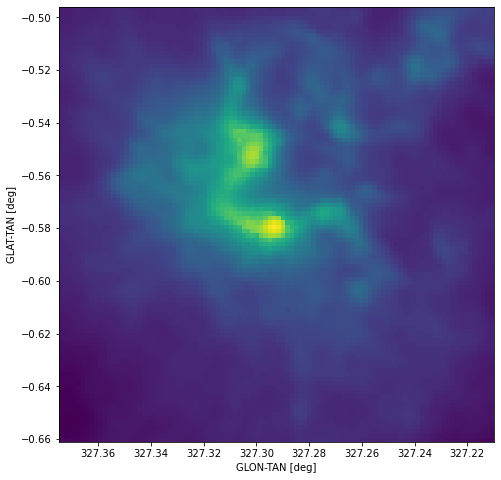

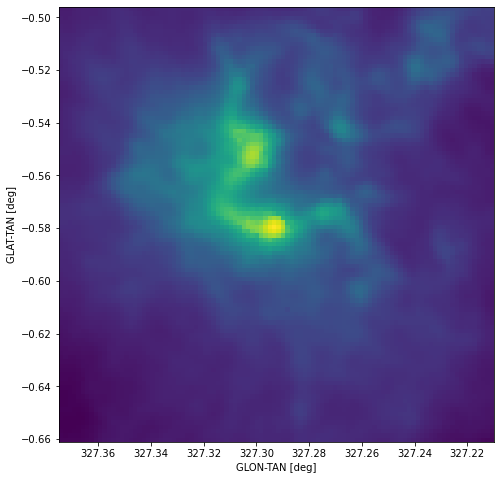

In [33]:
display_fits('SAT250_21_hist.fits')
display_fits('SAT250_21_mode.fits')